https://www.kaggle.com/toastls93/bayes-optimization-xgb

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


# 임의의 함수 최적화

In [24]:
def black_box_function(x,y):
    return -x**2 - (y-0) **2 +1

In [25]:
x_range = np.linspace(start = -100, stop = 100, num=1000)
y_range = np.linspace(start = -100, stop = 100, num=1000)

print('x_range shape : ', x_range.shape)
print('y_range shape : ', y_range.shape)

x_range shape :  (1000,)
y_range shape :  (1000,)


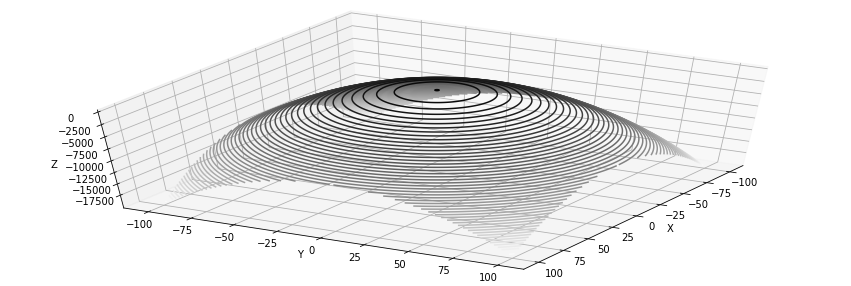

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, projection = '3d')

X, Y = np.meshgrid(x_range, y_range) #1000x1000 array로 만들어줌 좌표처럼
Z = black_box_function(X,Y)

ax = plt.axes(projection = '3d')
ax.contour3D(X,Y,Z,50, cmap = 'binary')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(50,30)

X = 0, Y = 0일 때, 함수가 최대화 됨

In [31]:
from bayes_opt import BayesianOptimization

In [32]:
pbounds = {'x' : (-10,10), 'y' : (-10, 10)}

optimizer = BayesianOptimization(
    f = black_box_function,
    pbounds = pbounds,
    verbose = 2, #verbose = 1 : print only when a maximum is observed / verbose = 0 is sielnt
    random_state = 1
)

optimizer.maximize(init_points = 2, n_iter=30)
#n_iter : 반복 횟수 많을 수록 정확한 값
#init_points : how many steps of random  exploration you want to perform

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -21.17    | -1.66     |  4.406    |
|  2        | -114.6    | -9.998    | -3.953    |
|  3        | -21.23    | -1.663    |  4.412    |
|  4        | -21.17    | -1.649    |  4.41     |
|  5        | -21.04    | -1.649    |  4.396    |
|  6        | -19.96    | -1.606    |  4.287    |
|  7        | -18.83    | -1.562    |  4.17     |
|  8        | -17.54    | -1.513    |  4.031    |
|  9        | -16.05    | -1.456    |  3.864    |
|  10       | -14.57    | -1.405    |  3.687    |
|  11       | -13.14    | -1.387    |  3.495    |
|  12       | -12.12    | -1.464    |  3.313    |
|  13       | -11.05    | -1.435    |  3.161    |
|  14       | -9.682    | -1.285    |  3.005    |
|  15       | -8.612    | -1.176    |  2.869    |
|  16       | -7.349    | -1.13     |  2.659    |
|  17       | -6.632    | -1.206    |  2.485    |
|  18       | -5.901    | -1.164    |  2.355    |


In [33]:
#(0,0)과 꽤 근접한 값을 찾아냄
optimizer.max

{'target': 0.9321146995251253,
 'params': {'x': -0.1372932288789734, 'y': 0.22144044296121812}}

In [34]:
optimizer.res #history 기록을 볼 수 있다.

[{'target': -21.17129204564928,
  'params': {'x': -1.6595599059485195, 'y': 4.4064898688431615}},
 {'target': -114.58322004264032,
  'params': {'x': -9.997712503653101, 'y': -3.9533485473632046}},
 {'target': -21.230235623180416,
  'params': {'x': -1.6626169247516014, 'y': 4.412022278356031}},
 {'target': -21.16586301442551,
  'params': {'x': -1.648864727811187, 'y': 4.409887540947689}},
 {'target': -21.04348668492093,
  'params': {'x': -1.648644884146389, 'y': 4.396072875976793}},
 {'target': -19.957095986894068,
  'params': {'x': -1.6056677873194218, 'y': 4.287065073410808}},
 {'target': -18.829751025872362,
  'params': {'x': -1.5619716066713716, 'y': 4.170131379923757}},
 {'target': -17.540539903786467,
  'params': {'x': -1.5126360227094697, 'y': 4.03143549701445}},
 {'target': -16.054888054139948,
  'params': {'x': -1.456493847461573, 'y': 3.8643904728231764}},
 {'target': -14.56586791828737,
  'params': {'x': -1.4047228382891679, 'y': 3.6868172813249362}},
 {'target': -13.13547239

In [36]:
optimizer.res[-7:]

[{'target': -0.5802984754520613,
  'params': {'x': -0.7975681939265334, 'y': 0.9716910267615055}},
 {'target': -0.24011694735223443,
  'params': {'x': -0.6967975999535556, 'y': 0.868671429282211}},
 {'target': 0.1670518817094273,
  'params': {'x': -0.539086802026238, 'y': 0.7364329828108572}},
 {'target': 0.4951852426726321,
  'params': {'x': -0.46995659121803096, 'y': 0.5328748067774423}},
 {'target': 0.6909409222649989,
  'params': {'x': -0.3319847576794492, 'y': 0.4459206189486179}},
 {'target': 0.8354938518175159,
  'params': {'x': -0.27444491841775126, 'y': 0.2986404777272464}},
 {'target': 0.9321146995251253,
  'params': {'x': -0.1372932288789734, 'y': 0.22144044296121812}}]

x와y 가 0부근에서 target값이 점점 커지는 것을 알 수 있음[](http://)

## changing pbounds

In [38]:
#x의 범위만 수정
optimizer.set_bounds(new_bounds={'x' : (-1,1)})
optimizer.maximize()

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  49       | -11.52    | -0.9452   |  3.409    |
|  50       | -0.4052   | -0.1654   |  1.174    |
|  51       | -35.97    | -0.7192   | -6.038    |
|  52       | -87.07    |  0.6015   |  9.365    |
|  53       | -13.93    | -0.3732   |  3.846    |
|  54       |  0.9997   |  0.004782 | -0.01806  |
|  55       |  0.9998   | -0.0131   |  0.006136 |
|  56       |  0.9999   | -0.01119  |  0.001031 |
|  57       |  0.9999   |  0.007622 |  0.004701 |
|  58       |  1.0      | -0.000863 | -0.002206 |
|  59       |  0.9999   | -0.01113  |  0.001957 |
|  60       |  0.9999   | -0.004458 | -0.007966 |
|  61       |  1.0      |  0.004597 | -0.000502 |
|  62       |  0.9999   | -0.006308 | -0.003304 |
|  63       |  0.9998   |  0.01431  |  6.038e-0 |
|  64       |  0.9999   | -0.003379 | -0.007294 |
|  65       |  1.0      |  0.000402 |  0.006567 |
|  66       |  1.0      | -0.00259  | -0.006017 |


In [39]:
optimizer.max

{'target': 0.9999943883406145,
 'params': {'x': -0.0008632952972964573, 'y': -0.0022059874467389626}}

# Ridge-Alpha 최적화
- using diabetes data

In [80]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

ridge = Ridge()
lr = LinearRegression()

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

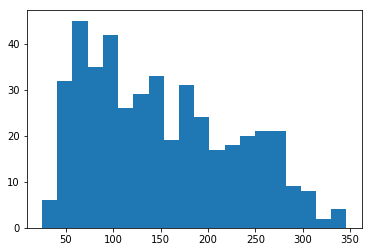

In [78]:
plt.hist(y, bins = 20)
plt.show()

## before tuning - linear regression, Ridge CV

In [84]:
from sklearn.model_selection import KFold
cv = KFold(n_splits = 5, random_state = 100)

In [87]:
rmse = np.sqrt(-cross_val_score(lr, X,y, scoring = 'neg_mean_squared_error', cv=cv))
print('Linear Regression 5-Fold mean RMSE : ', rmse.mean())

rmse = np.sqrt(-cross_val_score(ridge, X,y, scoring = 'neg_mean_squared_error', cv=cv))
print('Ridge Regression 5-Fold mean RMSE : ', rmse.mean())

Linear Regression 5-Fold mean RMSE :  54.69171350506142
Ridge Regression 5-Fold mean RMSE :  58.44918434610448


## Bayesian Optimization

In [90]:
def Ridge_cv(alpha) :
    ridge = Ridge(alpha = alpha)
    rmse = np.sqrt(-cross_val_score(ridge, X,y, scoring = 'neg_mean_squared_error', cv=cv))
    return -rmse.mean()

In [91]:
pbounds = {'alpha' : (0,10)}

Ridge_Bo = BayesianOptimization(f = Ridge_cv, pbounds = pbounds, verbose = 2, random_state = 1)
Ridge_Bo.maximize()

print(Ridge_Bo.max)

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -65.98    |  4.17     |
|  2        | -69.09    |  7.203    |
|  3        | -54.69    |  0.001144 |
|  4        | -64.08    |  3.023    |
|  5        | -60.14    |  1.468    |
|  6        | -55.0     |  0.1767   |
|  7        | -54.69    |  0.0      |
|  8        | -54.69    |  7.733e-0 |
|  9        | -54.69    |  5.137e-0 |
|  10       | -54.69    |  9.554e-0 |
|  11       | -54.69    |  9.554e-0 |
|  12       | -54.69    |  8.882e-1 |
|  13       | -54.69    |  1.591e-0 |
|  14       | -54.69    |  3.838e-0 |
|  15       | -54.69    |  7.735e-0 |
|  16       | -54.69    |  7.735e-0 |
|  17       | -54.69    |  5.88e-07 |
|  18       | -54.69    |  5.88e-07 |
|  19       | -54.69    |  5.88e-07 |
|  20       | -54.69    |  4.441e-1 |
|  21       | -54.69    |  4.441e-1 |
|  22       | -54.69    |  7.876e-0 |
|  23       | -54.69    |  2.204e-0 |
|  24       | -54.69    |  2.204e-0 |
|  25       

In [94]:
ridge = Ridge()
rmse = np.sqrt(-cross_val_score(ridge, X,y, scoring = 'neg_mean_squared_error', cv=cv))
print('before tuning Ridge Regression 5-Fold mean RMSE : ', rmse.mean())

ridge = Ridge(alpha = Ridge_Bo.max['params']['alpha'])
rmse = np.sqrt(-cross_val_score(ridge, X,y, scoring = 'neg_mean_squared_error', cv=cv))
print('after tuning Ridge Regression 5-Fold mean RMSE : ', rmse.mean())

before tuning Ridge Regression 5-Fold mean RMSE :  58.44918434610448
after tuning Ridge Regression 5-Fold mean RMSE :  54.69170984145471


# SVM - C, gamma 최적화
- using breast cancer

In [108]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

In [109]:
pd.Series(y).value_counts()

1    357
0    212
dtype: int64

In [117]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

cv = StratifiedKFold(n_splits = 5, random_state = 100)
svm = SVC(gamma = 'auto', kernel = 'rbf')

In [118]:
acc = cross_val_score(svm, X,y, scoring = 'accuracy', cv=cv)
print('SVM 5-Fold mean accuracy : ', acc.mean())

SVM 5-Fold mean accuracy :  0.6274259330511736


In [119]:
def SVM_rbf_cv(gamma, C) :
    model = SVC(kernel = 'rbf', gamma = gamma, C = C)
    acc = cross_val_score(model, X, y, scoring='accuracy', cv = 5).mean()
    return acc

In [120]:
pbounds = {'gamma'  : (0.001, 1000), 'C' : (0.001, 1000)}

SVM_rbf_BO = BayesianOptimization(f = SVM_rbf_cv, pbounds = pbounds, verbose = 2, random_state = 1)
SVM_rbf_BO.maximize(init_points= 2)

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
|  1        |  0.6274   |  417.0    |  720.3    |
|  2        |  0.6274   |  0.1154   |  302.3    |
|  3        |  0.6274   |  998.1    |  0.2641   |
|  4        |  0.6274   |  1e+03    |  996.0    |
|  5        |  0.6274   |  2.73     |  997.7    |
|  6        |  0.6274   |  2.772    |  4.184    |
|  7        |  0.6274   |  994.9    |  1.234    |
|  8        |  0.6274   |  999.1    |  999.0    |
|  9        |  0.6274   |  1.41     |  996.9    |
|  10       |  0.6274   |  1.242    |  2.704    |
|  11       |  0.6274   |  999.4    |  3.467    |
|  12       |  0.6274   |  999.7    |  999.0    |
|  13       |  0.6274   |  0.2892   |  998.0    |
|  14       |  0.6274   |  0.7043   |  1.01     |
|  15       |  0.6274   |  999.4    |  5.892    |
|  16       |  0.6274   |  999.3    |  998.2    |
|  17       |  0.6274   |  2.018    |  999.5    |
|  18       |  0.6274   |  1.431    |  0.7194   |


In [121]:
SVM_rbf_BO.max

{'target': 0.6274259330511736,
 'params': {'C': 417.0225876805693, 'gamma': 720.3247731176647}}

좋아지지 않음 ㅜㅜ

# XGBoost
- using breast cancer

In [125]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [124]:
acc = cross_val_score(xgb, X,y, scoring = 'accuracy', cv=cv)
print('XGBoost 5-Fold mean accuracy : ', acc.mean())

XGBoost 5-Fold mean accuracy :  0.9632320123124278


In [133]:
def XGB_cv(max_depth, learning_rate, n_estimators, gamma, min_child_weight, max_delta_step,
          subsample, colsample_bytree, silent = True, nthread = -1) :
    
    model = XGBClassifier(max_depth = int(max_depth), learning_rate = learning_rate,
                           n_estimators = int(n_estimators), silent = silent, nthresd = nthread,
                           gamma = gamma, min_child_weight = min_child_weight, max_delta_step = max_delta_step,
                           subsample = subsample , colsample_bytree = colsample_bytree)
    
    acc = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv).mean()
    return acc

In [134]:
pbounds = {'max_depth' : (3,10),
           'learning_rate' : (0.0001,0.5),
           'n_estimators' : (10,1000),
           'gamma' : (0.001,1),
           'min_child_weight' : (0,0.1),
           'max_delta_step' : (0,0.4),
           'subsample' : (0.5,0.8),
           'colsample_bytree' : (0.2,0.99)
           
}

xgb_BO = BayesianOptimization(f = XGB_cv, pbounds = pbounds, verbose = 2, random_state = 1)
xgb_BO.maximize(init_points = 3)

print(xgb_BO.max)

|   iter    |  target   | colsam... |   gamma   | learni... | max_de... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.9493   |  0.5294   |  0.7206   |  0.000157 |  0.1209   |  4.027    |  0.009234 |  194.4    |  0.6037   |
|  2        |  0.9597   |  0.5134   |  0.5393   |  0.2097   |  0.2741   |  4.431    |  0.08781  |  37.11    |  0.7011   |
|  3        |  0.9527   |  0.5297   |  0.5591   |  0.07028  |  0.07924  |  8.605    |  0.09683  |  320.3    |  0.7077   |
|  4        |  0.979    |  0.4037   |  0.174    |  0.4101   |  0.3064   |  3.339    |  0.09808  |  999.9    |  0.5512   |
|  5        |  0.9667   |  0.8932   |  0.8368   |  0.3105   |  0.2317   |  3.012    |  0.03237  |  771.2    |  0.6194   |
|  6        |  0.9773   |  0.6943   |  0.02665  |  0.2692   |  0.2445   |  9.993    |  0.05757  |  999.5    |  0.5107   |
|  7        |  0.9684   

In [138]:
xgb = XGBClassifier()
acc = cross_val_score(xgb, X,y, scoring = 'accuracy', cv=cv)
print('Default XGBoost 5-Fold mean accuracy : ', acc.mean())

xgb = XGBClassifier(colsample_bytree = xgb_BO.max['params']['colsample_bytree'],
             gamma = xgb_BO.max['params']['gamma'],
             learning_rate = xgb_BO.max['params']['learning_rate'],
             max_delta_step = xgb_BO.max['params']['max_delta_step'],
             max_depth = 3,
             min_child_weight = xgb_BO.max['params']['min_child_weight'],
             n_estimators = 848,
             subsample = xgb_BO.max['params']['subsample'])
acc = cross_val_score(xgb, X,y, scoring = 'accuracy', cv=cv)
print('after tuning XGBoost 5-Fold mean accuracy : ', acc.mean())

Default XGBoost 5-Fold mean accuracy :  0.9632320123124278
after tuning XGBoost 5-Fold mean accuracy :  0.9807464409388225
